In [99]:
import pytz
from datetime import datetime, timedelta
from gym_mtsim import MtSimulator, OrderType, Timeframe, FOREX_DATA_PATH
import matplotlib.pyplot as plt

selected_symbol = ['EURUSD', 'GBPCAD', 'GBPUSD', 'USDCAD', 'USDCHF', 'GBPJPY', 'USDJPY']
file_name = '4H_train_final.pkl'

# Create sim
sim = MtSimulator(
    unit='USD',
    balance=10000.,
    leverage=100.,
    stop_out_level=0.2,
    hedge=False,
)

# Load or create new file
if not sim.load_symbols(file_name):
    sim.download_data(
        symbols = selected_symbol,
        time_range=(
            datetime(2021, 4, 15, tzinfo=pytz.UTC),
            datetime(2022, 1, 15, tzinfo=pytz.UTC)
        ),
        timeframe=Timeframe.H4
        #timeframe=Timeframe.D1
    )

In [100]:
df = sim.symbols_data

for i in selected_symbol:
    df[i] = df[i].rename(columns=str.lower)

df

{'EURUSD':                               open    close      low     high  volume
 Time                                                                 
 2021-04-15 00:00:00+00:00  1.19781  1.19861  1.19761  1.19884    3168
 2021-04-15 04:00:00+00:00  1.19860  1.19704  1.19698  1.19897    5255
 2021-04-15 08:00:00+00:00  1.19704  1.19808  1.19702  1.19901    8555
 2021-04-15 12:00:00+00:00  1.19808  1.19583  1.19571  1.19933    9949
 2021-04-15 16:00:00+00:00  1.19583  1.19709  1.19561  1.19840   12310
 ...                            ...      ...      ...      ...     ...
 2022-01-14 04:00:00+00:00  1.14662  1.14789  1.14625  1.14829    4748
 2022-01-14 08:00:00+00:00  1.14790  1.14583  1.14574  1.14806   10945
 2022-01-14 12:00:00+00:00  1.14583  1.14383  1.14332  1.14612   13197
 2022-01-14 16:00:00+00:00  1.14382  1.14024  1.13987  1.14500   20770
 2022-01-14 20:00:00+00:00  1.14024  1.14151  1.14015  1.14179    5829
 
 [1182 rows x 5 columns],
 'GBPCAD':                             

# Change volume data type to float

In [101]:
for symbol in range(0,len(selected_symbol)):
    #print(type(sim.symbols_data[selected_symbol[symbol]]))
    df[selected_symbol[symbol]]['volume'] = df[selected_symbol[symbol]]['volume'].astype(float)
print(df[selected_symbol[2]].dtypes)

open      float64
close     float64
low       float64
high      float64
volume    float64
dtype: object


## Add indicator for each selected_symbol

In [102]:
from finta import TA

moving_average = 15

for symbol in range(0,len(selected_symbol)):
    # Volume
    df[selected_symbol[symbol]]['MFI'] = TA.MFI(df[selected_symbol[symbol]])
    df[selected_symbol[symbol]]['OBV'] = TA.OBV(df[selected_symbol[symbol]])
    df[selected_symbol[symbol]]['EFI'] = TA.EFI(df[selected_symbol[symbol]])
    df[selected_symbol[symbol]]['CFI'] = TA.CFI(df[selected_symbol[symbol]])
    df[selected_symbol[symbol]]['EMV'] = TA.EMV(df[selected_symbol[symbol]])
    df[selected_symbol[symbol]]['VPT'] = TA.VPT(df[selected_symbol[symbol]])
    df[selected_symbol[symbol]]['VWAP'] = TA.VWAP(df[selected_symbol[symbol]])
    
    # Volatility
    df[selected_symbol[symbol]]['ATR'] = TA.ATR(df[selected_symbol[symbol]])
    
    # Trend
    df[selected_symbol[symbol]]['SMA'] = TA.SMA(df[selected_symbol[symbol]], moving_average)
    df[selected_symbol[symbol]]['EMA'] = TA.EMA(df[selected_symbol[symbol]], moving_average)
    df[selected_symbol[symbol]]['WMA'] = TA.WMA(df[selected_symbol[symbol]])
    df[selected_symbol[symbol]]['ADX'] = TA.ADX(df[selected_symbol[symbol]])
    df[selected_symbol[symbol]]['TRIX'] = TA.TRIX(df[selected_symbol[symbol]])
    df[selected_symbol[symbol]]['MI'] = TA.MI(df[selected_symbol[symbol]])
    df[selected_symbol[symbol]]['CCI'] = TA.CCI(df[selected_symbol[symbol]])
    df[selected_symbol[symbol]]['SAR'] = TA.SAR(df[selected_symbol[symbol]])
    df[selected_symbol[symbol]]['STC'] = TA.STC(df[selected_symbol[symbol]])
    
    # Momentum
    df[selected_symbol[symbol]]['RSI'] = TA.RSI(df[selected_symbol[symbol]])
    df[selected_symbol[symbol]]['STOCHRSI'] = TA.STOCHRSI(df[selected_symbol[symbol]])
    df[selected_symbol[symbol]]['UO'] = TA.UO(df[selected_symbol[symbol]])
    df[selected_symbol[symbol]]['STOCH'] = TA.STOCH(df[selected_symbol[symbol]])
    df[selected_symbol[symbol]]['STOCHD'] = TA.STOCHD(df[selected_symbol[symbol]])
    df[selected_symbol[symbol]]['WILLIAMS'] = TA.WILLIAMS(df[selected_symbol[symbol]])
    df[selected_symbol[symbol]]['OBV'] = TA.OBV(df[selected_symbol[symbol]])
    df[selected_symbol[symbol]]['AO'] = TA.AO(df[selected_symbol[symbol]])
    df[selected_symbol[symbol]]['KAMA'] = TA.KAMA(df[selected_symbol[symbol]])
    df[selected_symbol[symbol]]['ROC'] = TA.ROC(df[selected_symbol[symbol]])

df[selected_symbol[0]].head()

,open,close,low,high,volume,MFI,OBV,EFI,CFI,EMV,...,STC,RSI,STOCHRSI,UO,STOCH,STOCHD,WILLIAMS,AO,KAMA,ROC
Time,,,,,,,,,,,,,,,,,,,,,
2021-04-15 00:00:00+00:00,1.19781,1.19861,1.19761,1.19884,3168.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-04-15 04:00:00+00:00,1.19860,1.19704,1.19698,1.19897,5255.0,NaN,-5255.0,-8.250350,NaN,NaN,...,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-04-15 08:00:00+00:00,1.19704,1.19808,1.19702,1.19901,8555.0,NaN,3300.0,0.982946,NaN,NaN,...,NaN,41.635688,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-04-15 12:00:00+00:00,1.19808,1.19583,1.19571,1.19933,9949.0,NaN,-6649.0,-8.033130,NaN,NaN,...,NaN,21.134199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-04-15 16:00:00+00:00,1.19583,1.19709,1.19561,1.19840,12310.0,NaN,5661.0,-0.724985,NaN,NaN,...,NaN,39.191622,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
# Fill NA

for symbol in range(0,len(selected_symbol)):
    df[selected_symbol[symbol]].fillna(0, inplace=True)

df[selected_symbol[0]].head()

,open,close,low,high,volume,MFI,OBV,EFI,CFI,EMV,...,STC,RSI,STOCHRSI,UO,STOCH,STOCHD,WILLIAMS,AO,KAMA,ROC
Time,,,,,,,,,,,,,,,,,,,,,
2021-04-15 00:00:00+00:00,1.19781,1.19861,1.19761,1.19884,3168.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-04-15 04:00:00+00:00,1.19860,1.19704,1.19698,1.19897,5255.0,0.0,-5255.0,-8.250350,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-04-15 08:00:00+00:00,1.19704,1.19808,1.19702,1.19901,8555.0,0.0,3300.0,0.982946,0.0,0.0,...,0.0,41.635688,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-04-15 12:00:00+00:00,1.19808,1.19583,1.19571,1.19933,9949.0,0.0,-6649.0,-8.033130,0.0,0.0,...,0.0,21.134199,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-04-15 16:00:00+00:00,1.19583,1.19709,1.19561,1.19840,12310.0,0.0,5661.0,-0.724985,0.0,0.0,...,0.0,39.191622,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [104]:
import seaborn as sns
import pandas as pd

volume_list = ['MFI','OBV','EFI','CFI','EMV','VPT','VWAP']
trend_list = ['SMA','EMA','WMA','ADX','TRIX','MI','CCI','SAR','STC']
momentum_list = ['RSI','STOCHRSI','UO','STOCH','STOCHD','WILLIAMS','AO','KAMA','ROC','OBV']

In [105]:
# Volume

for symbol in range(0,len(selected_symbol)):
    print('------')
    print('Corr for', selected_symbol[symbol])
    print('------')
    print(df[selected_symbol[symbol]][volume_list].corr())

------
Corr for EURUSD
------
           MFI       OBV       EFI       CFI       EMV       VPT      VWAP
MFI   1.000000  0.079241  0.512788  0.024792  0.633447  0.096458 -0.052871
OBV   0.079241  1.000000  0.035978  0.965201  0.160670  0.978985  0.902190
EFI   0.512788  0.035978  1.000000 -0.007213  0.678981  0.085288 -0.115248
CFI   0.024792  0.965201 -0.007213  1.000000  0.146632  0.966730  0.907396
EMV   0.633447  0.160670  0.678981  0.146632  1.000000  0.207573 -0.014915
VPT   0.096458  0.978985  0.085288  0.966730  0.207573  1.000000  0.898345
VWAP -0.052871  0.902190 -0.115248  0.907396 -0.014915  0.898345  1.000000
------
Corr for GBPCAD
------
           MFI       OBV       EFI       CFI       EMV       VPT      VWAP
MFI   1.000000  0.224310  0.601938  0.046663  0.580299  0.145028 -0.197102
OBV   0.224310  1.000000  0.179473  0.442647  0.081115  0.569312 -0.016192
EFI   0.601938  0.179473  1.000000  0.068105  0.565511  0.202922 -0.174849
CFI   0.046663  0.442647  0.068105  1.00

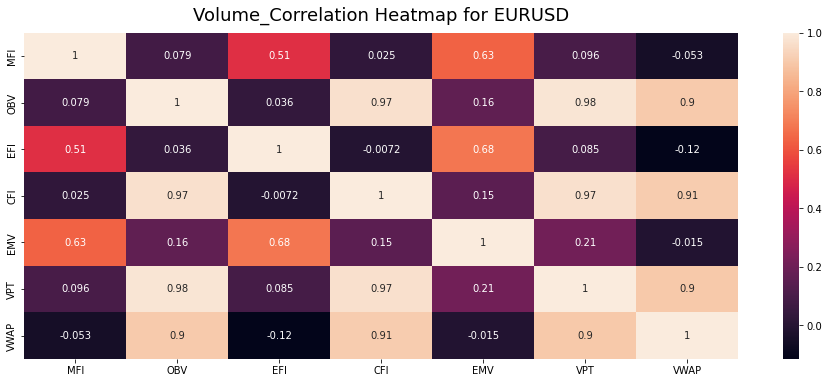

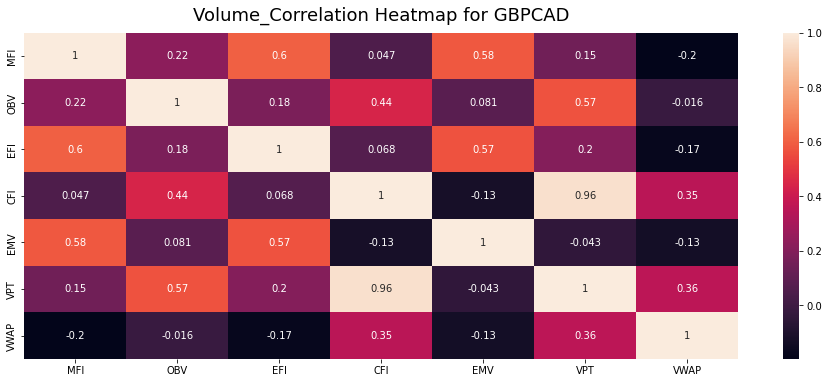

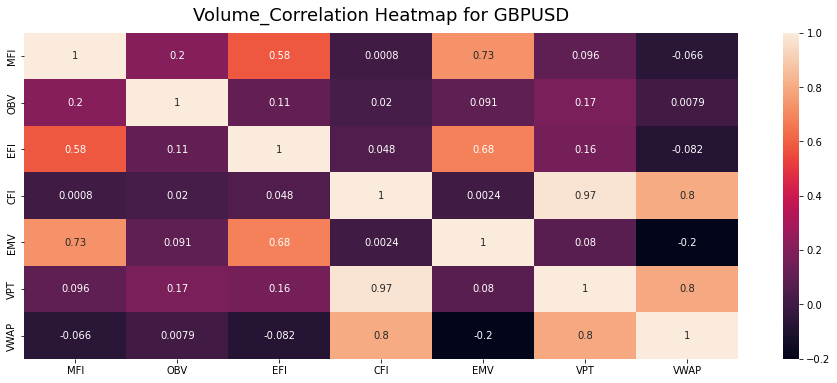

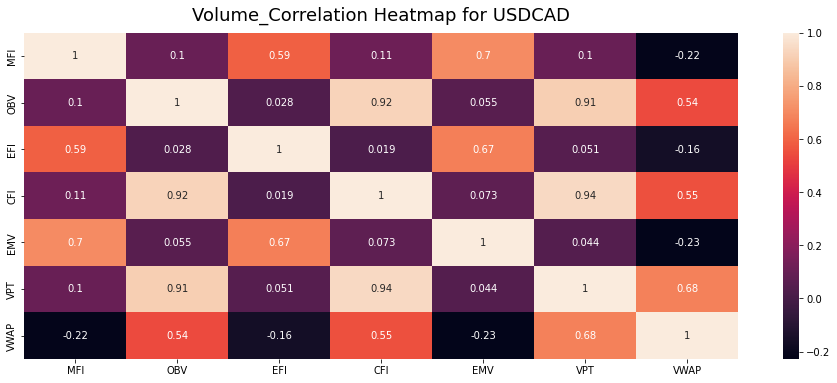

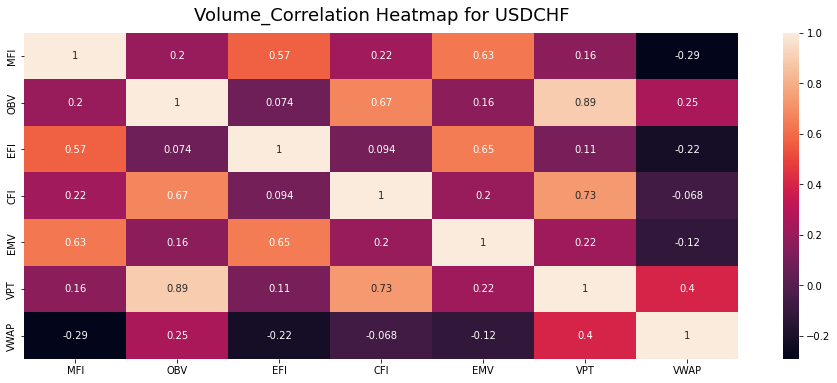

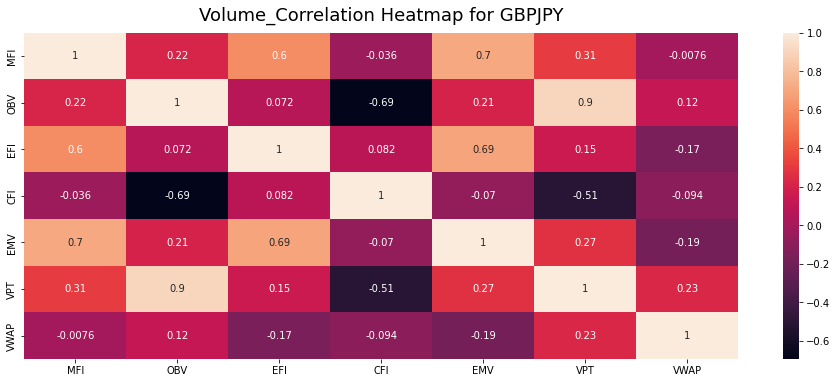

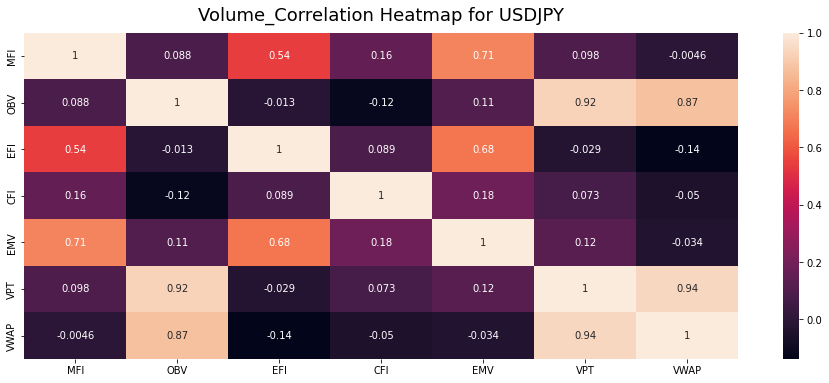

In [106]:
for symbol in range(0,len(selected_symbol)):
    plt.figure(figsize=(16, 6))
    heatmap = sns.heatmap(df[selected_symbol[symbol]][volume_list].corr() ,annot=True)
    heatmap.set_title('Volume_Correlation Heatmap for '+selected_symbol[symbol] , fontdict={'fontsize':18}, pad=12);

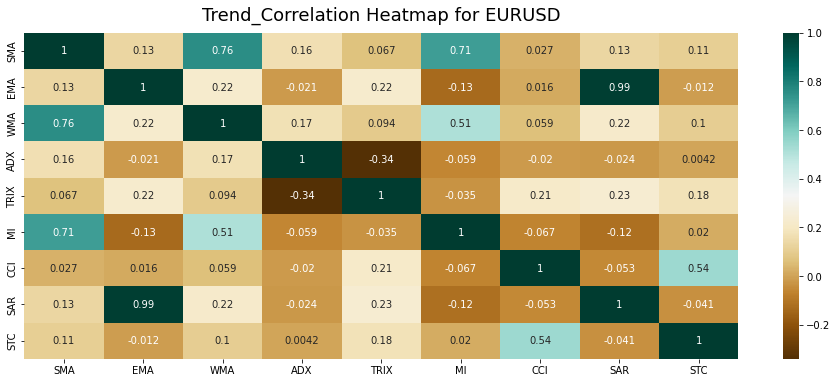

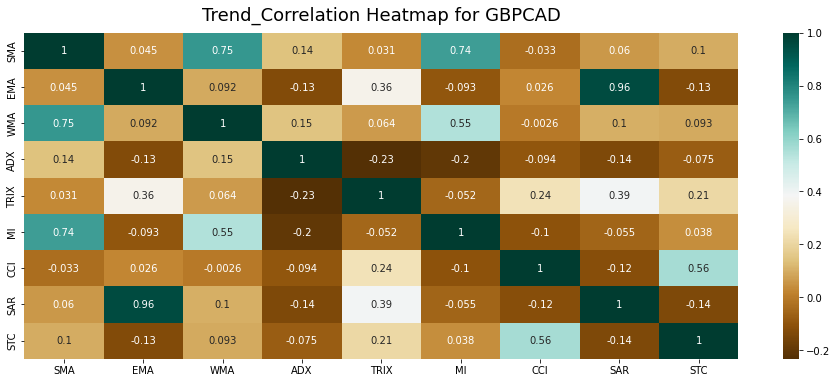

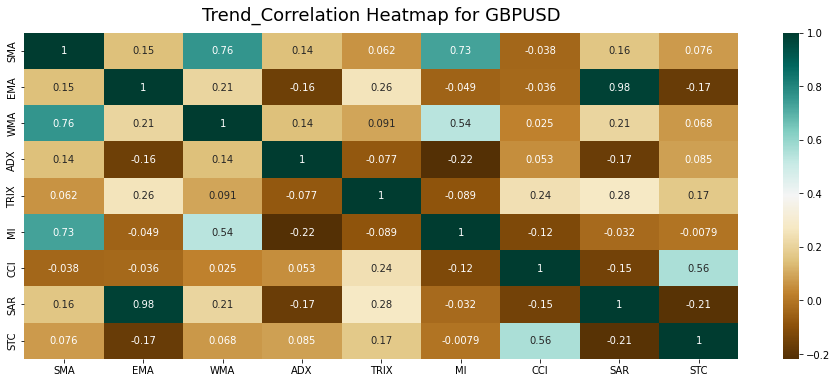

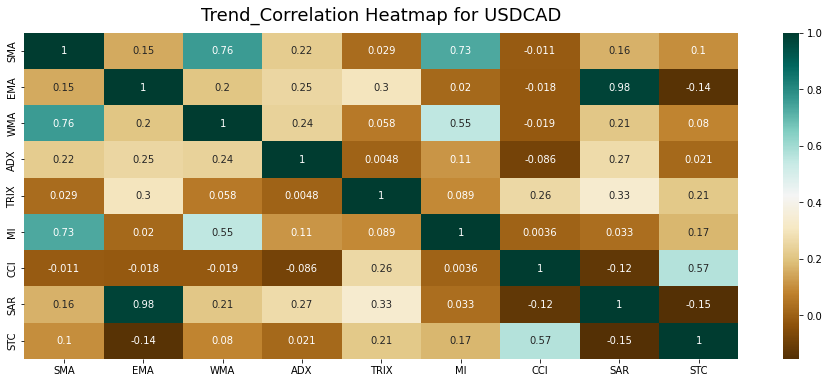

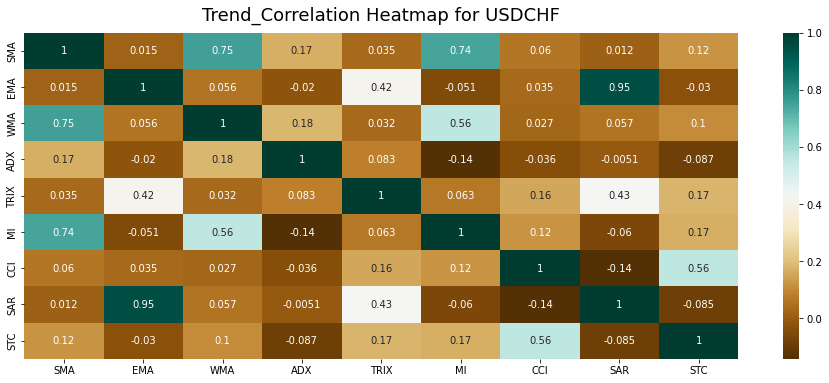

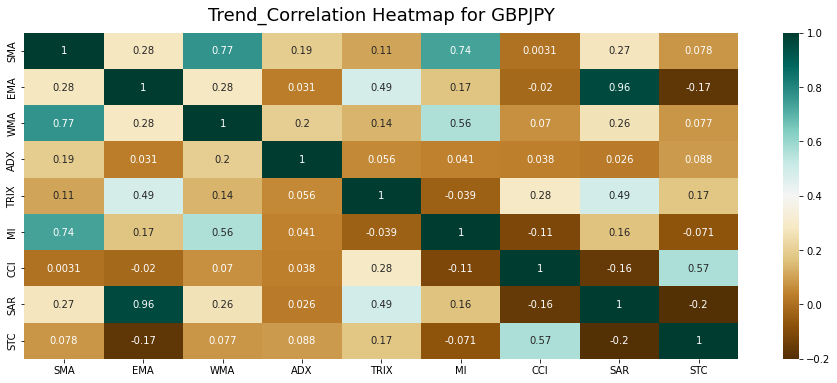

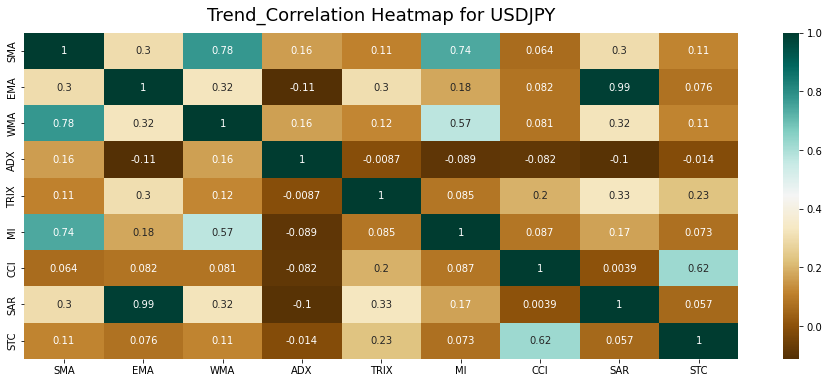

In [107]:
for symbol in range(0,len(selected_symbol)):
    plt.figure(figsize=(16, 6))
    heatmap = sns.heatmap(df[selected_symbol[symbol]][trend_list].corr(), cmap='BrBG', annot=True)
    heatmap.set_title('Trend_Correlation Heatmap for '+selected_symbol[symbol] , fontdict={'fontsize':18}, pad=12);

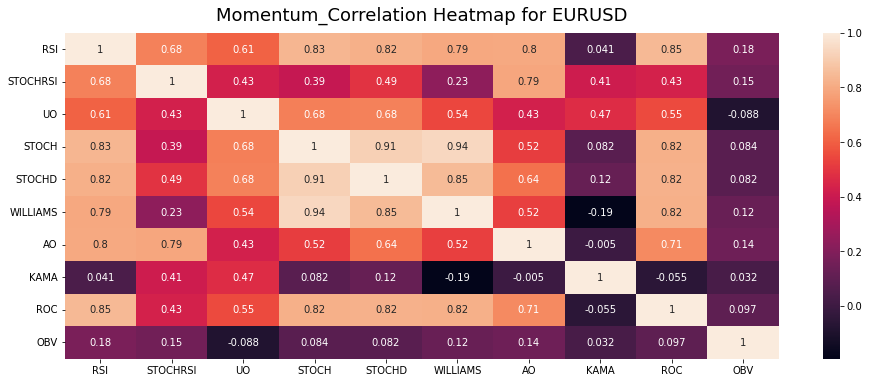

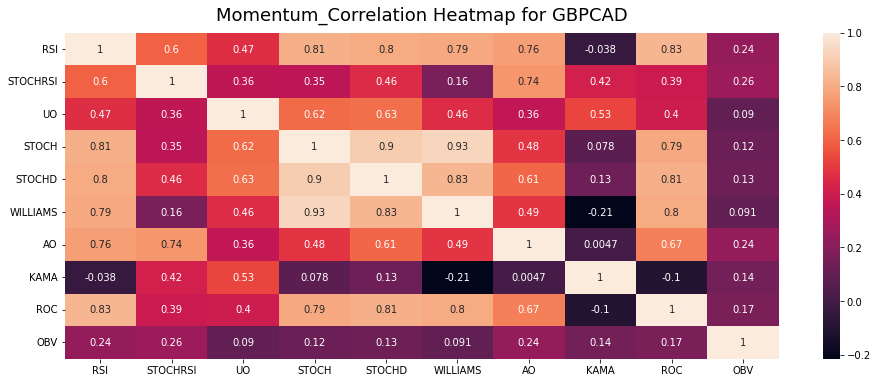

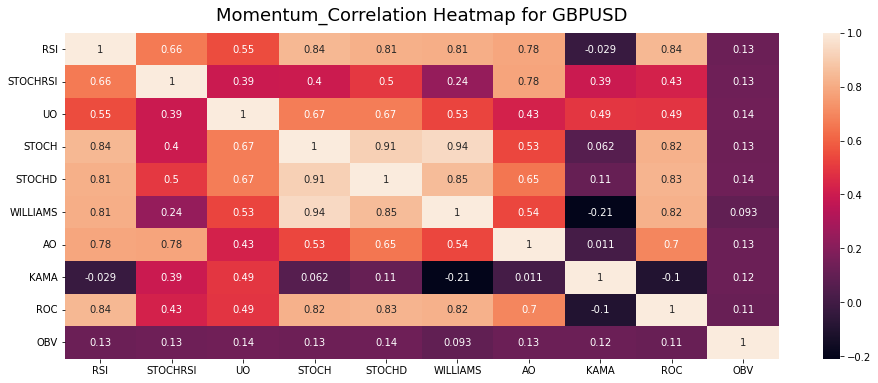

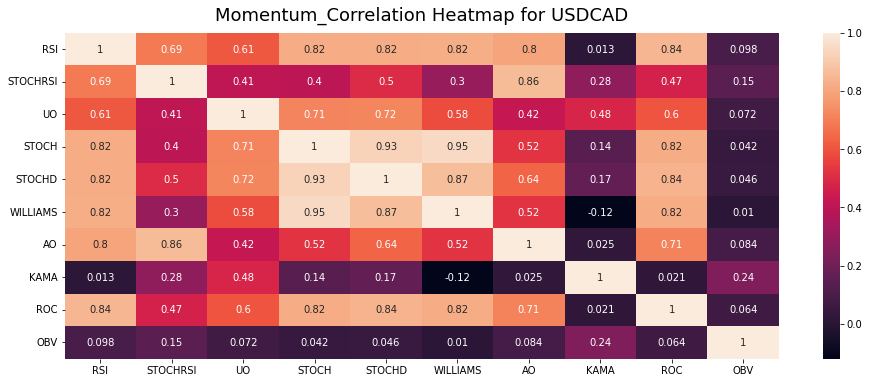

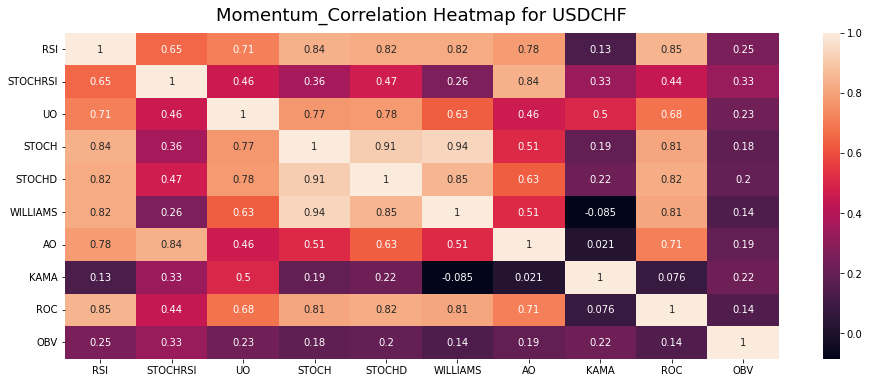

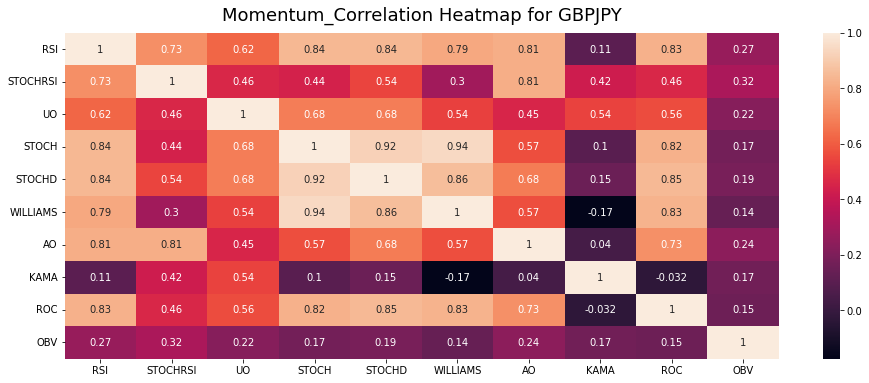

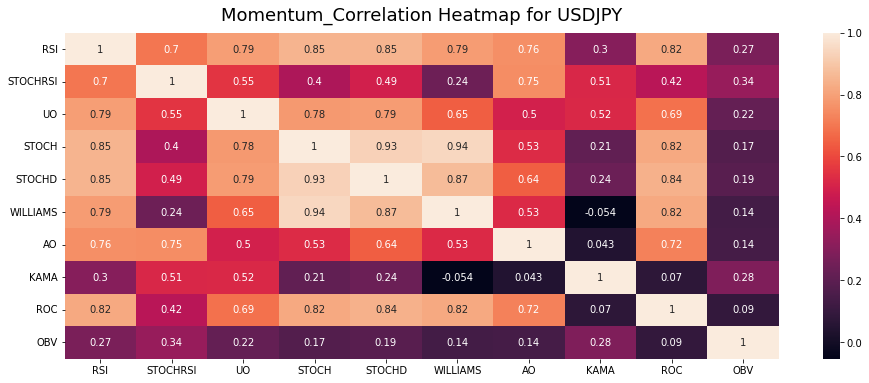

In [108]:
for symbol in range(0,len(selected_symbol)):
    plt.figure(figsize=(16, 6))
    heatmap = sns.heatmap(df[selected_symbol[symbol]][momentum_list].corr() ,annot=True)
    heatmap.set_title('Momentum_Correlation Heatmap for '+selected_symbol[symbol] , fontdict={'fontsize':18}, pad=12);

In [109]:
#sim.save_symbols('2017-2021_4H.pkl')

# คัด feature

In [110]:
# Volume

#volume_list_new = ['MFI','EFI','CFI','EMV','VPT','VWAP','OBV']
volume_list_new = ['EFI']

for symbol in range(0,len(selected_symbol)):
    print('------')
    print('Corr for', selected_symbol[symbol])
    print('------')
    print(df[selected_symbol[symbol]][volume_list_new].corr())
    
# MFI-EFI, MFI-EMV

------
Corr for EURUSD
------
     EFI
EFI  1.0
------
Corr for GBPCAD
------
     EFI
EFI  1.0
------
Corr for GBPUSD
------
     EFI
EFI  1.0
------
Corr for USDCAD
------
     EFI
EFI  1.0
------
Corr for USDCHF
------
     EFI
EFI  1.0
------
Corr for GBPJPY
------
     EFI
EFI  1.0
------
Corr for USDJPY
------
     EFI
EFI  1.0


In [111]:
#trend_list_new = ['SMA','EMA','WMA','ADX','TRIX','MI','CCI','SAR','STC']
trend_list_new = ['ADX']

for symbol in range(0,len(selected_symbol)):
    print('------')
    print('Corr for', selected_symbol[symbol])
    print('------')
    print(df[selected_symbol[symbol]][trend_list_new].corr())
    
# MFI-EFI, MFI-EMV

------
Corr for EURUSD
------
     ADX
ADX  1.0
------
Corr for GBPCAD
------
     ADX
ADX  1.0
------
Corr for GBPUSD
------
     ADX
ADX  1.0
------
Corr for USDCAD
------
     ADX
ADX  1.0
------
Corr for USDCHF
------
     ADX
ADX  1.0
------
Corr for GBPJPY
------
     ADX
ADX  1.0
------
Corr for USDJPY
------
     ADX
ADX  1.0


In [112]:
#momentum_list_new = ['RSI','STOCHRSI','UO','STOCH','STOCHD','WILLIAMS','AO','KAMA','ROC','OBV']
momentum_list_new = ['STOCHRSI']
#momentum_list_new = ['RSI']

for symbol in range(0,len(selected_symbol)):
    print('------')
    print('Corr for', selected_symbol[symbol])
    print('------')
    print(df[selected_symbol[symbol]][momentum_list_new].corr())
    
# MFI-EFI, MFI-EMV

------
Corr for EURUSD
------
          STOCHRSI
STOCHRSI       1.0
------
Corr for GBPCAD
------
          STOCHRSI
STOCHRSI       1.0
------
Corr for GBPUSD
------
          STOCHRSI
STOCHRSI       1.0
------
Corr for USDCAD
------
          STOCHRSI
STOCHRSI       1.0
------
Corr for USDCHF
------
          STOCHRSI
STOCHRSI       1.0
------
Corr for GBPJPY
------
          STOCHRSI
STOCHRSI       1.0
------
Corr for USDJPY
------
          STOCHRSI
STOCHRSI       1.0


In [113]:
volatility_list_new = ['ATR']
indicator_list = volume_list_new + trend_list_new + momentum_list_new + volatility_list_new


for symbol in range(0,len(selected_symbol)):
    print('------')
    print('Corr for', selected_symbol[symbol])
    print('------')
    print(df[selected_symbol[symbol]][indicator_list].corr())

------
Corr for EURUSD
------
               EFI       ADX  STOCHRSI       ATR
EFI       1.000000 -0.096486  0.307174 -0.117480
ADX      -0.096486  1.000000 -0.172564  0.184572
STOCHRSI  0.307174 -0.172564  1.000000  0.258558
ATR      -0.117480  0.184572  0.258558  1.000000
------
Corr for GBPCAD
------
               EFI       ADX  STOCHRSI       ATR
EFI       1.000000 -0.065050  0.297891 -0.100005
ADX      -0.065050  1.000000 -0.128345  0.363477
STOCHRSI  0.297891 -0.128345  1.000000  0.285733
ATR      -0.100005  0.363477  0.285733  1.000000
------
Corr for GBPUSD
------
               EFI       ADX  STOCHRSI       ATR
EFI       1.000000  0.019374  0.317183 -0.155337
ADX       0.019374  1.000000  0.042596  0.276118
STOCHRSI  0.317183  0.042596  1.000000  0.095797
ATR      -0.155337  0.276118  0.095797  1.000000
------
Corr for USDCAD
------
               EFI       ADX  STOCHRSI       ATR
EFI       1.000000  0.034774  0.335982  0.005426
ADX       0.034774  1.000000  0.053481  0.30329

In [114]:
for symbol in range(0,len(selected_symbol)):
    df[selected_symbol[symbol]] = df[selected_symbol[symbol]][['open', 'close', 'low', 'high', 'volume'] + indicator_list]
    print(df[selected_symbol[symbol]].head())

                              open    close      low     high   volume  \
Time                                                                     
2021-04-15 00:00:00+00:00  1.19781  1.19861  1.19761  1.19884   3168.0   
2021-04-15 04:00:00+00:00  1.19860  1.19704  1.19698  1.19897   5255.0   
2021-04-15 08:00:00+00:00  1.19704  1.19808  1.19702  1.19901   8555.0   
2021-04-15 12:00:00+00:00  1.19808  1.19583  1.19571  1.19933   9949.0   
2021-04-15 16:00:00+00:00  1.19583  1.19709  1.19561  1.19840  12310.0   

                                EFI  ADX  STOCHRSI  ATR  
Time                                                     
2021-04-15 00:00:00+00:00  0.000000  0.0       0.0  0.0  
2021-04-15 04:00:00+00:00 -8.250350  0.0       0.0  0.0  
2021-04-15 08:00:00+00:00  0.982946  0.0       0.0  0.0  
2021-04-15 12:00:00+00:00 -8.033130  0.0       0.0  0.0  
2021-04-15 16:00:00+00:00 -0.724985  0.0       0.0  0.0  
                              open    close      low     high   volume  \
T

In [115]:
df[selected_symbol[0]].shape

(1182, 9)

In [116]:
df

{'EURUSD':                               open    close      low     high   volume  \
 Time                                                                     
 2021-04-15 00:00:00+00:00  1.19781  1.19861  1.19761  1.19884   3168.0   
 2021-04-15 04:00:00+00:00  1.19860  1.19704  1.19698  1.19897   5255.0   
 2021-04-15 08:00:00+00:00  1.19704  1.19808  1.19702  1.19901   8555.0   
 2021-04-15 12:00:00+00:00  1.19808  1.19583  1.19571  1.19933   9949.0   
 2021-04-15 16:00:00+00:00  1.19583  1.19709  1.19561  1.19840  12310.0   
 ...                            ...      ...      ...      ...      ...   
 2022-01-14 04:00:00+00:00  1.14662  1.14789  1.14625  1.14829   4748.0   
 2022-01-14 08:00:00+00:00  1.14790  1.14583  1.14574  1.14806  10945.0   
 2022-01-14 12:00:00+00:00  1.14583  1.14383  1.14332  1.14612  13197.0   
 2022-01-14 16:00:00+00:00  1.14382  1.14024  1.13987  1.14500  20770.0   
 2022-01-14 20:00:00+00:00  1.14024  1.14151  1.14015  1.14179   5829.0   
 
             

# Change column name to match with observation space

In [117]:
# Change column to lower case
for i in selected_symbol:
    #sim.symbols_data[i] = sim.symbols_data[i].rename({'close':'Close'})
    df[i].rename({'close':'Close', 'open':'Open', 'low':'Low','high':'High','volume':'Volume'}, axis=1, inplace=True)

df

{'EURUSD':                               Open    Close      Low     High   Volume  \
 Time                                                                     
 2021-04-15 00:00:00+00:00  1.19781  1.19861  1.19761  1.19884   3168.0   
 2021-04-15 04:00:00+00:00  1.19860  1.19704  1.19698  1.19897   5255.0   
 2021-04-15 08:00:00+00:00  1.19704  1.19808  1.19702  1.19901   8555.0   
 2021-04-15 12:00:00+00:00  1.19808  1.19583  1.19571  1.19933   9949.0   
 2021-04-15 16:00:00+00:00  1.19583  1.19709  1.19561  1.19840  12310.0   
 ...                            ...      ...      ...      ...      ...   
 2022-01-14 04:00:00+00:00  1.14662  1.14789  1.14625  1.14829   4748.0   
 2022-01-14 08:00:00+00:00  1.14790  1.14583  1.14574  1.14806  10945.0   
 2022-01-14 12:00:00+00:00  1.14583  1.14383  1.14332  1.14612  13197.0   
 2022-01-14 16:00:00+00:00  1.14382  1.14024  1.13987  1.14500  20770.0   
 2022-01-14 20:00:00+00:00  1.14024  1.14151  1.14015  1.14179   5829.0   
 
             

# Check suitable window size

In [118]:
df['EURUSD'].head()

,Open,Close,Low,High,Volume,EFI,ADX,STOCHRSI,ATR
Time,,,,,,,,,
2021-04-15 00:00:00+00:00,1.19781,1.19861,1.19761,1.19884,3168.0,0.000000,0.0,0.0,0.0
2021-04-15 04:00:00+00:00,1.19860,1.19704,1.19698,1.19897,5255.0,-8.250350,0.0,0.0,0.0
2021-04-15 08:00:00+00:00,1.19704,1.19808,1.19702,1.19901,8555.0,0.982946,0.0,0.0,0.0
2021-04-15 12:00:00+00:00,1.19808,1.19583,1.19571,1.19933,9949.0,-8.033130,0.0,0.0,0.0
2021-04-15 16:00:00+00:00,1.19583,1.19709,1.19561,1.19840,12310.0,-0.724985,0.0,0.0,0.0


In [119]:
# start => window size should start at 15 to prevent 0 data
start = 13
end = 20

for i in selected_symbol:
    print("--------")
    print(i)
    print("--------")
    print(df[i][['ADX','STOCHRSI','ATR']].iloc[start-1:end])

--------
EURUSD
--------
                                  ADX  STOCHRSI       ATR
Time                                                     
2021-04-19 00:00:00+00:00    0.000000  0.000000  0.000000
2021-04-19 04:00:00+00:00  100.000000  0.000000  0.002119
2021-04-19 08:00:00+00:00   76.339151  0.518439  0.002564
2021-04-19 12:00:00+00:00   71.007411  0.584463  0.002609
2021-04-19 16:00:00+00:00   65.440227  0.610703  0.002647
2021-04-19 20:00:00+00:00   62.151324  0.655346  0.002444
2021-04-20 00:00:00+00:00   60.528955  0.683743  0.002339
2021-04-20 04:00:00+00:00   61.399175  0.720615  0.002440
--------
GBPCAD
--------
                                  ADX  STOCHRSI       ATR
Time                                                     
2021-04-19 00:00:00+00:00    0.000000  0.000000  0.000000
2021-04-19 04:00:00+00:00  100.000000  0.000000  0.004440
2021-04-19 08:00:00+00:00  100.000000  0.607784  0.004529
2021-04-19 12:00:00+00:00  100.000000  0.673618  0.005336
2021-04-19 16:00:00+00

# Check min,max,mean

In [120]:
for i in selected_symbol:
    print('symbol :',i)
    display(df[i].describe().loc[['mean','std','min','max']])

symbol : EURUSD


,Open,Close,Low,High,Volume,EFI,ADX,STOCHRSI,ATR
mean,1.173071,1.173047,1.171911,1.174225,9813.698816,-1.264306,24.417535,0.612829,0.002290
std,0.029145,0.029141,0.029194,0.029131,5638.233882,7.898206,11.083732,0.145288,0.000508
min,1.119570,1.119580,1.118610,1.120520,1637.000000,-53.985826,0.000000,0.000000,0.000000
max,1.225980,1.225970,1.224620,1.226640,41277.000000,26.154371,100.000000,0.918675,0.004044


symbol : GBPCAD


,Open,Close,Low,High,Volume,EFI,ADX,STOCHRSI,ATR
mean,1.716607,1.716714,1.714573,1.718761,13501.381557,-1.690280,23.999999,0.607305,0.004147
std,0.018751,0.018732,0.018818,0.018785,8550.529684,14.677063,11.858671,0.128369,0.000829
min,1.668080,1.668080,1.663870,1.672030,1035.000000,-59.965138,0.000000,0.000000,0.000000
max,1.758720,1.758630,1.755990,1.762560,53045.000000,68.843126,100.000000,0.909822,0.007179


symbol : GBPUSD


,Open,Close,Low,High,Volume,EFI,ADX,STOCHRSI,ATR
mean,1.373653,1.373691,1.372026,1.375318,11347.763113,-1.467559,24.997666,0.573850,0.003260
std,0.025576,0.025570,0.025609,0.025587,6732.669186,12.165679,11.290911,0.132624,0.000632
min,1.318530,1.318530,1.316020,1.320670,1150.000000,-53.145268,0.000000,0.000000,0.000000
max,1.423300,1.423320,1.422650,1.424900,40483.000000,39.853644,100.000000,0.908640,0.005075


symbol : USDCAD


,Open,Close,Low,High,Volume,EFI,ADX,STOCHRSI,ATR
mean,1.250040,1.250092,1.248507,1.251665,9401.668359,0.618575,25.421888,0.394814,0.003123
std,0.022303,0.022317,0.022207,0.022467,5386.488359,9.941511,10.916065,0.139896,0.000738
min,1.202270,1.202280,1.200660,1.204150,1700.000000,-34.763734,0.000000,0.000000,0.000000
max,1.294170,1.294140,1.293420,1.296410,36160.000000,42.892011,100.000000,0.740783,0.005233


symbol : USDCHF


,Open,Close,Low,High,Volume,EFI,ADX,STOCHRSI,ATR
mean,0.916486,0.916517,0.915406,0.917560,6106.404399,-0.144456,22.921403,0.362723,0.002132
std,0.009095,0.009103,0.009053,0.009102,3944.854171,4.689006,10.368448,0.126986,0.000391
min,0.893550,0.893550,0.892610,0.894470,1143.000000,-24.282430,0.000000,0.000000,0.000000
max,0.935720,0.935750,0.935580,0.937370,25871.000000,29.641176,100.000000,0.766976,0.003465


symbol : GBPJPY


,Open,Close,Low,High,Volume,EFI,ADX,STOCHRSI,ATR
mean,152.923393,152.936843,152.714739,153.135520,15311.692893,-174.939847,27.383131,0.618228,0.416271
std,2.109436,2.109717,2.117033,2.101029,8402.702644,2032.270888,11.419606,0.150752,0.102030
min,148.886000,148.890000,148.459000,149.268000,708.000000,-11365.388949,0.000000,0.000000,0.000000
max,158.162000,158.162000,157.961000,158.216000,55509.000000,6125.953877,100.000000,0.934976,0.789571


symbol : USDJPY


,Open,Close,Low,High,Volume,EFI,ADX,STOCHRSI,ATR
mean,111.358572,111.365718,111.243024,111.472492,10189.967005,-16.733911,24.132033,0.607597,0.226640
std,2.209135,2.209226,2.198447,2.216516,5226.251453,774.377426,10.014708,0.136774,0.062126
min,107.514000,107.515000,107.477000,107.852000,2046.000000,-7953.329529,0.000000,0.000000,0.000000
max,116.261000,116.261000,116.077000,116.349000,42401.000000,2545.233700,100.000000,0.898221,0.563929


# Check Normal/ Gaussian distribution (for EURUSD as other are similar)

array([[<AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'Close'}>,
        <AxesSubplot:title={'center':'Low'}>],
       [<AxesSubplot:title={'center':'High'}>,
        <AxesSubplot:title={'center':'Volume'}>,
        <AxesSubplot:title={'center':'EFI'}>],
       [<AxesSubplot:title={'center':'ADX'}>,
        <AxesSubplot:title={'center':'STOCHRSI'}>,
        <AxesSubplot:title={'center':'ATR'}>]], dtype=object)

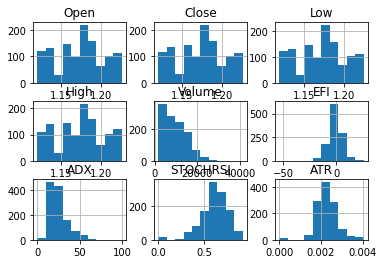

In [121]:
df['EURUSD'].hist()

Your data doesn’t follow Normal/ Gaussian distribution (Prefer this in case of doubt also) so we choose Min-Max scaling. and z-score cannot deal well with non-stationary time series since the mean and standard deviation of the time series vary over time.

z-score not good because it use mean and variance

# Normalize data using MinMax

In [122]:
# Create a copy of open, close

for i in selected_symbol:
    df[i]['open'] = df[i]['Open']
    df[i]['close'] = df[i]['Close']
    df[i]['low'] = df[i]['Low']
    df[i]['high'] = df[i]['High']

df['EURUSD'].head()

,Open,Close,Low,High,Volume,EFI,ADX,STOCHRSI,ATR,open,close,low,high
Time,,,,,,,,,,,,,
2021-04-15 00:00:00+00:00,1.19781,1.19861,1.19761,1.19884,3168.0,0.000000,0.0,0.0,0.0,1.19781,1.19861,1.19761,1.19884
2021-04-15 04:00:00+00:00,1.19860,1.19704,1.19698,1.19897,5255.0,-8.250350,0.0,0.0,0.0,1.19860,1.19704,1.19698,1.19897
2021-04-15 08:00:00+00:00,1.19704,1.19808,1.19702,1.19901,8555.0,0.982946,0.0,0.0,0.0,1.19704,1.19808,1.19702,1.19901
2021-04-15 12:00:00+00:00,1.19808,1.19583,1.19571,1.19933,9949.0,-8.033130,0.0,0.0,0.0,1.19808,1.19583,1.19571,1.19933
2021-04-15 16:00:00+00:00,1.19583,1.19709,1.19561,1.19840,12310.0,-0.724985,0.0,0.0,0.0,1.19583,1.19709,1.19561,1.19840


In [123]:
from sklearn.preprocessing import MinMaxScaler
import joblib
import numpy as np

# Volume
#columns = ['Open','Close','Low','High','Volume','EFI','ADX','ATR','STOCHRSI']
columns = ['open','close','low','high','Volume','EFI','ADX','ATR','STOCHRSI']
scaler = MinMaxScaler()


for i in selected_symbol:
    scaler.fit(df[i][columns])
    df[i][columns] = scaler.transform(df[i][columns])
    #scaler.transform(df[i][columns])
    display(df[i])
    scaler_filename = "scaler/scaler_" + i + "_4H"
    joblib.dump(scaler, scaler_filename) 
    print("Save to",scaler_filename)
    
#sim.symbols_data['EURUSD'][columns] = min_max.fit_transform(sim.symbols_data['EURUSD'][columns])

#sim.symbols_data['EURUSD']

,Open,Close,Low,High,Volume,EFI,ADX,STOCHRSI,ATR,open,close,low,high
Time,,,,,,,,,,,,,
2021-04-15 00:00:00+00:00,1.19781,1.19861,1.19761,1.19884,0.038623,0.673642,0.000000,0.000000,0.000000,0.735269,0.742833,0.745213,0.738032
2021-04-15 04:00:00+00:00,1.19860,1.19704,1.19698,1.19897,0.091271,0.570693,0.000000,0.000000,0.000000,0.742693,0.728076,0.739270,0.739257
2021-04-15 08:00:00+00:00,1.19704,1.19808,1.19702,1.19901,0.174521,0.685908,0.000000,0.000000,0.000000,0.728033,0.737851,0.739647,0.739634
2021-04-15 12:00:00+00:00,1.19808,1.19583,1.19571,1.19933,0.209687,0.573404,0.000000,0.000000,0.000000,0.737807,0.716703,0.727290,0.742650
2021-04-15 16:00:00+00:00,1.19583,1.19709,1.19561,1.19840,0.269248,0.664596,0.000000,0.000000,0.000000,0.716662,0.728546,0.726347,0.733886
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-14 04:00:00+00:00,1.14662,1.14789,1.14625,1.14829,0.078481,0.747528,0.280746,0.996601,0.604027,0.254205,0.266096,0.260730,0.261685
2022-01-14 08:00:00+00:00,1.14790,1.14583,1.14574,1.14806,0.234813,0.696781,0.291843,1.000000,0.625397,0.266234,0.246734,0.255919,0.259518
2022-01-14 12:00:00+00:00,1.14583,1.14383,1.14332,1.14612,0.291625,0.646426,0.286452,0.995722,0.656482,0.246781,0.227935,0.233091,0.241236


Save to scaler/scaler_EURUSD_4H


,Open,Close,Low,High,Volume,EFI,ADX,STOCHRSI,ATR,open,close,low,high
Time,,,,,,,,,,,,,
2021-04-15 00:00:00+00:00,1.72483,1.72497,1.72355,1.72523,0.060411,0.465538,0.000000,0.000000,0.000000,0.626103,0.628272,0.647851,0.587651
2021-04-15 04:00:00+00:00,1.72491,1.72429,1.72395,1.72505,0.113517,0.428906,0.000000,0.000000,0.000000,0.626986,0.620762,0.652193,0.585662
2021-04-15 08:00:00+00:00,1.72429,1.72032,1.72030,1.72575,0.179465,0.276548,0.000000,0.000000,0.000000,0.620146,0.576919,0.612571,0.593394
2021-04-15 12:00:00+00:00,1.72032,1.72542,1.71965,1.72573,0.242626,0.558048,0.000000,0.000000,0.000000,0.576346,0.633241,0.605515,0.593174
2021-04-15 16:00:00+00:00,1.72542,1.72890,1.72222,1.73073,0.339589,0.686130,0.000000,0.000000,0.000000,0.632613,0.671673,0.633413,0.648404
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-14 04:00:00+00:00,1.71659,1.71517,1.71517,1.71782,0.108095,0.482650,0.342236,0.571324,0.486169,0.535194,0.520044,0.556882,0.505799
2022-01-14 08:00:00+00:00,1.71518,1.71422,1.71273,1.71626,0.267699,0.464445,0.347152,0.579764,0.493632,0.519638,0.509553,0.530395,0.488567
2022-01-14 12:00:00+00:00,1.71422,1.71621,1.71272,1.71770,0.354932,0.507628,0.342959,0.594515,0.523781,0.509047,0.531530,0.530287,0.504474


Save to scaler/scaler_GBPCAD_4H


,Open,Close,Low,High,Volume,EFI,ADX,STOCHRSI,ATR,open,close,low,high
Time,,,,,,,,,,,,,
2021-04-15 00:00:00+00:00,1.37773,1.37904,1.37723,1.37916,0.081916,0.571461,0.000000,0.000000,0.000000,0.565047,0.577441,0.574041,0.561163
2021-04-15 04:00:00+00:00,1.37901,1.37660,1.37644,1.37941,0.107696,0.430149,0.000000,0.000000,0.000000,0.577264,0.554156,0.566632,0.563561
2021-04-15 08:00:00+00:00,1.37660,1.37777,1.37648,1.37980,0.211324,0.570339,0.000000,0.000000,0.000000,0.554262,0.565321,0.567007,0.567303
2021-04-15 12:00:00+00:00,1.37777,1.37848,1.37611,1.38085,0.226248,0.600372,0.000000,0.000000,0.000000,0.565429,0.572097,0.563537,0.577377
2021-04-15 16:00:00+00:00,1.37848,1.37859,1.37713,1.37947,0.324893,0.596512,0.000000,0.000000,0.000000,0.572206,0.573146,0.573103,0.564137
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-14 04:00:00+00:00,1.37121,1.37327,1.37113,1.37374,0.099840,0.608495,0.357234,0.881047,0.537931,0.502816,0.522378,0.516834,0.509162
2022-01-14 08:00:00+00:00,1.37327,1.37339,1.37159,1.37432,0.231205,0.605093,0.369092,0.885469,0.554539,0.522478,0.523523,0.521148,0.514727
2022-01-14 12:00:00+00:00,1.37340,1.37001,1.36949,1.37340,0.340503,0.524780,0.365935,0.879100,0.590429,0.523719,0.491268,0.501454,0.505900


Save to scaler/scaler_GBPUSD_4H


,Open,Close,Low,High,Volume,EFI,ADX,STOCHRSI,ATR,open,close,low,high
Time,,,,,,,,,,,,,
2021-04-15 00:00:00+00:00,1.25194,1.25085,1.25068,1.25216,0.048549,0.447665,0.000000,0.000000,0.000000,0.540479,0.528739,0.539241,0.520377
2021-04-15 04:00:00+00:00,1.25081,1.25256,1.25045,1.25263,0.120633,0.576637,0.000000,0.000000,0.000000,0.528183,0.547355,0.536762,0.525471
2021-04-15 08:00:00+00:00,1.25257,1.24865,1.24823,1.25286,0.168514,0.303662,0.000000,0.000000,0.000000,0.547334,0.504790,0.512829,0.527964
2021-04-15 12:00:00+00:00,1.24865,1.25167,1.24768,1.25191,0.175392,0.475418,0.000000,0.000000,0.000000,0.504679,0.537666,0.506900,0.517667
2021-04-15 16:00:00+00:00,1.25168,1.25406,1.25038,1.25584,0.326378,0.590491,0.000000,0.000000,0.000000,0.537650,0.563684,0.536007,0.560264
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-14 04:00:00+00:00,1.25190,1.24901,1.24891,1.25218,0.117644,0.405862,0.405240,0.186527,0.556102,0.540044,0.508709,0.520160,0.520594
2022-01-14 08:00:00+00:00,1.24900,1.24816,1.24703,1.25045,0.280905,0.394039,0.407805,0.189172,0.576713,0.508487,0.499456,0.499892,0.501843
2022-01-14 12:00:00+00:00,1.24824,1.25271,1.24769,1.25353,0.223825,0.480489,0.395089,0.206861,0.625990,0.500218,0.548988,0.507007,0.535227


Save to scaler/scaler_USDCAD_4H


,Open,Close,Low,High,Volume,EFI,ADX,STOCHRSI,ATR,open,close,low,high
Time,,,,,,,,,,,,,
2021-04-15 00:00:00+00:00,0.92239,0.92264,0.92162,0.92317,0.070689,0.450312,0.000000,0.000000,0.000000,0.683899,0.689336,0.675122,0.668998
2021-04-15 04:00:00+00:00,0.92265,0.92375,0.92237,0.92399,0.091758,0.520547,0.000000,0.000000,0.000000,0.690064,0.715640,0.692576,0.688112
2021-04-15 08:00:00+00:00,0.92375,0.92264,0.92173,0.92375,0.162003,0.425656,0.000000,0.000000,0.000000,0.716149,0.689336,0.677682,0.682517
2021-04-15 12:00:00+00:00,0.92265,0.92446,0.92137,0.92458,0.205273,0.516154,0.000000,0.000000,0.000000,0.690064,0.732464,0.669304,0.701865
2021-04-15 16:00:00+00:00,0.92445,0.92236,0.92064,0.92454,0.300469,0.392081,0.000000,0.000000,0.000000,0.732748,0.682701,0.652316,0.700932
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-14 04:00:00+00:00,0.91071,0.90973,0.90954,0.91086,0.050631,0.308340,0.321698,0.243235,0.625850,0.406924,0.383412,0.393996,0.382051
2022-01-14 08:00:00+00:00,0.90970,0.91099,0.90947,0.91101,0.266742,0.354455,0.332306,0.217232,0.640899,0.382974,0.413270,0.392367,0.385548
2022-01-14 12:00:00+00:00,0.91098,0.91134,0.91015,0.91192,0.365739,0.377594,0.335788,0.193492,0.668934,0.413327,0.421564,0.408192,0.406760


Save to scaler/scaler_USDCHF_4H


,Open,Close,Low,High,Volume,EFI,ADX,STOCHRSI,ATR,open,close,low,high
Time,,,,,,,,,,,,,
2021-04-15 00:00:00+00:00,150.056,150.146,149.968,150.167,0.113648,0.649772,0.000000,0.000000,0.000000,0.126132,0.135462,0.158809,0.100469
2021-04-15 04:00:00+00:00,150.146,149.869,149.837,150.159,0.142497,0.514894,0.000000,0.000000,0.000000,0.135834,0.105587,0.145022,0.099575
2021-04-15 08:00:00+00:00,149.869,149.866,149.859,150.201,0.224996,0.586316,0.000000,0.000000,0.000000,0.105972,0.105263,0.147337,0.104269
2021-04-15 12:00:00+00:00,149.866,149.984,149.757,150.142,0.254594,0.648957,0.000000,0.000000,0.000000,0.105649,0.117990,0.136603,0.097675
2021-04-15 16:00:00+00:00,149.983,149.850,149.684,149.992,0.333936,0.604009,0.000000,0.000000,0.000000,0.118262,0.103538,0.128920,0.080912
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-14 04:00:00+00:00,156.097,156.167,156.002,156.247,0.178902,0.534325,0.146508,0.657235,0.557174,0.777382,0.784836,0.793833,0.779951
2022-01-14 08:00:00+00:00,156.167,156.443,155.993,156.462,0.268535,0.585586,0.145477,0.645063,0.576533,0.784929,0.814603,0.792886,0.803979
2022-01-14 12:00:00+00:00,156.443,155.596,155.457,156.519,0.370285,0.449484,0.154600,0.621203,0.648453,0.814683,0.723253,0.736477,0.810349


Save to scaler/scaler_GBPJPY_4H


,Open,Close,Low,High,Volume,EFI,ADX,STOCHRSI,ATR,open,close,low,high
Time,,,,,,,,,,,,,
2021-04-15 00:00:00+00:00,108.912,108.875,108.821,108.965,0.063759,0.757564,0.000000,0.000000,0.000000,0.159826,0.155500,0.156279,0.130987
2021-04-15 04:00:00+00:00,108.875,108.869,108.803,108.932,0.071441,0.754747,0.000000,0.000000,0.000000,0.155596,0.154814,0.154186,0.127104
2021-04-15 08:00:00+00:00,108.869,108.773,108.701,108.958,0.119465,0.722452,0.000000,0.000000,0.000000,0.154910,0.143837,0.142326,0.130164
2021-04-15 12:00:00+00:00,108.773,108.800,108.664,108.878,0.147739,0.743945,0.000000,0.000000,0.000000,0.143935,0.146924,0.138023,0.120748
2021-04-15 16:00:00+00:00,108.801,108.696,108.611,108.807,0.206914,0.716205,0.000000,0.000000,0.000000,0.147136,0.135033,0.131860,0.112393
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-14 04:00:00+00:00,113.841,113.723,113.635,113.895,0.157378,0.615212,0.326536,0.416494,0.515389,0.723334,0.709810,0.716047,0.711192
2022-01-14 08:00:00+00:00,113.723,113.909,113.689,113.932,0.220468,0.663244,0.345569,0.403293,0.530209,0.709843,0.731077,0.722326,0.715547
2022-01-14 12:00:00+00:00,113.909,113.574,113.480,113.991,0.266064,0.618448,0.366071,0.384133,0.575681,0.731108,0.692774,0.698023,0.722490


Save to scaler/scaler_USDJPY_4H


In [124]:
#Save data
sim.save_symbols(file_name)